 # Visualisierung des Datensatzes

## Vorbereitungen

Zu Beginn werden die relevanten Packages geladen.

In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler

Hier wird der aufbereitete Dataframe geladen. 
Desweiteren schauen wir ihn uns einmal an.

In [36]:
path='MdB_Indexed.csv'
graph_path='graphs/'
df=pd.read_csv(path)

df.head(5)

,WP-JAHRE,NUMIND,ID,ANFANG,VORNAME,NACHNAME,ALTER,GESCHLECHT,PARTEI_KURZ,BERUF,...,WP10,WP11,WP12,WP13,WP14,WP15,WP16,WP17,WP18,WP19
0,1949-1953;01,0,11000009,1949,Konrad,Adenauer,73,1,Union,Bundeskanzler a. D.,...,0,0,0,0,0,0,0,0,0,0
1,1949-1953;01,1,11000013,1949,Willi,Agatz,45,1,Andere,"Bergmann, Gewerkschaftsfunktionär",...,0,0,0,0,0,0,0,0,0,0
2,1949-1953;01,2,11000015,1949,Adolf,Ahrens,70,1,Andere,Kapitän a. D.,...,0,0,0,0,0,0,0,0,0,0
3,1949-1953;01,3,11000020,1949,Johannes,Albers,59,1,Union,Geschäftsführer,...,0,0,0,0,0,0,0,0,0,0
4,1949-1953;01,4,11000021,1949,Luise,Albertz,48,0,SPD,Buchhalterin,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df.tail(5)

,WP-JAHRE,NUMIND,ID,ANFANG,VORNAME,NACHNAME,ALTER,GESCHLECHT,PARTEI_KURZ,BERUF,...,WP10,WP11,WP12,WP13,WP14,WP15,WP16,WP17,WP18,WP19
11595,2017-;19,11595,11004936,2017,Christian,Wirth,54,1,AfD,Rechtsanwalt,...,0,0,0,0,0,0,0,0,0,1
11596,2017-;19,11596,11004937,2017,Uwe,Witt,58,1,AfD,"Dipl.-Personalwirt, Betriebsschlosser, Staatl....",...,0,0,0,0,0,0,0,0,0,1
11597,2017-;19,11597,11004938,2017,Paul,Ziemiak,32,1,Union,Angestellter / Student,...,0,0,0,0,0,0,0,0,0,1
11598,2017-;19,11598,11004941,2017,Gyde,Jensen,28,0,FDP,Politikwissenschaftlerin,...,0,0,0,0,0,0,0,0,0,1
11599,2017-;19,11599,11004942,2017,Marja-Liisa,Völlers,33,0,SPD,Studienrätin,...,0,0,0,0,0,0,0,0,0,1


In der Analyse werden die Jahre 1949 (1. Bundestag), 1983 und 2017 (aktueller Bundestag) gesondert betrachtet. Um diese Jahre einzeln betrachten zu können, erstellen wir neue DataFrames, indem wir den AusgangsFrame slicen.  

In [32]:
df_1949=df[df.ANFANG==1949]
df_1983=df[df.ANFANG==1983]
df_2017=df[df.ANFANG==2017]

Des weiteren werden DataFrames für die einzelnen Parteien erstellt, um diese in der Analyse getrennt betrachten zu können. Zusätzlich wird eine colormap für die Parteien eingeführt.

In [33]:
df_SPD= df[df.PARTEI_KURZ == "SPD"]
df_UNION= df[df.PARTEI_KURZ == "Union"]
df_GRUENE= df[df.PARTEI_KURZ == "Bündnis 90/Die Grünen"]
df_FDP= df[df.PARTEI_KURZ == "FDP"]
df_LINKE= df[df.PARTEI_KURZ == "Die Linke"]

df_ALL=pd.concat([df_UNION, df_SPD, df_FDP, df_GRUENE, df_LINKE])

party_list=[df_UNION, df_SPD, df_FDP, df_GRUENE, df_LINKE]
label_list=['Union', 'SPD', 'FDP', 'Grüne', 'Linke']

color_dict={'Union': 'black', 'SPD': 'red', 'FDP': 'yellow', 'Bündnis 90/Die Grünen': 'green', 'Die Linke': 'pink', 'AfD': 'blue', 'Andere': 'grey'}

## Altersstruktur

Bei der Betrachtung der Alterstruktur ist zu beachten, dass das Alter des MdB zu Beginn der jeweiligen Wahlperiode berechnet wird. 
Zu Beginn schauen wir uns das Durchschnittsalter der MdB im zeitlichen Verlauf an.

C:\Users\Laszlo Kuehl\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


FileNotFoundError: [Errno 2] No such file or directory: 'graphs/age_average.png'

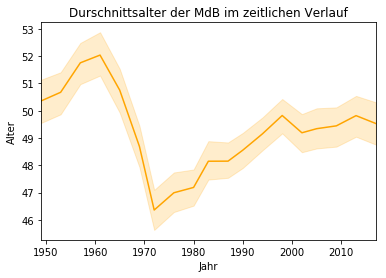

In [34]:
sns.lineplot(x="ANFANG", y="ALTER", data=df, color='orange')
plt.xlabel('Jahr')
plt.xlim(1949, 2017)
plt.ylabel('Alter')
plt.title('Durschnittsalter der MdB im zeitlichen Verlauf')
plt.savefig(graph_path+'age_average.png')

Als nächstes schauen wir uns die Altersverteilung im Bundestag an. Die Alterstruktur wird mithilfe eines Histogramms geplotted. Die Zahl der Bins wurde so gewählt, das ein bin 5 Jahre abdeckt.

FileNotFoundError: [Errno 2] No such file or directory: 'graphs/age_distribution_1949_allparties.png'

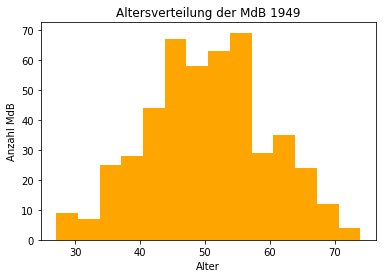

In [35]:
df_1949.ALTER.plot(kind="hist", title="Altersverteilung der MdB 1949", bins=14, color='orange')
plt.xlabel("Alter")
plt.ylabel("Anzahl MdB")
plt.savefig(graph_path+'age_distribution_1949_allparties.png')

In [ ]:
df_1983.ALTER.plot(kind="hist", title="Altersverteilung der MdB 1983", bins=14, color='orange')
plt.xlabel("Alter")
plt.ylabel("Anzahl MdB")
plt.savefig(graph_path+'age_distribution_1983_allparties.png')

In [ ]:
df_2017.ALTER.plot(kind="hist", title="Altersverteilung der MdB 2017", bins=14, color='orange')
plt.xlabel("Alter")
plt.ylabel("Anzahl MdB")
plt.savefig(graph_path+'age_distribution_2017_allparties.png')

Im Folgenden schlüsseln wir die Altersverteilung nach Parteien auf. Dazu schauen wir uns wieder die oben bereits ausgewählten Wahlperioden an. 

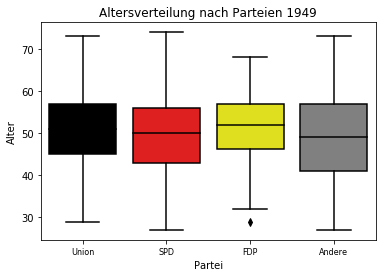

In [10]:
sns.boxplot(df_1949['PARTEI_KURZ'], df_1949['ALTER'], order=('Union', 'SPD', 'FDP', 'Andere'), palette=color_dict)
plt.title('Altersverteilung nach Parteien 1949')
plt.xticks(size=8)
plt.xlabel('Partei')
plt.ylabel('Alter')
plt.savefig(graph_path+'age_distribution_1949.png')

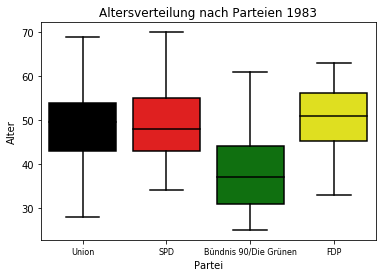

In [11]:
sns.boxplot(df_1983['PARTEI_KURZ'], df_1983['ALTER'], order=('Union', 'SPD', 'Bündnis 90/Die Grünen', 'FDP'), palette=color_dict)
plt.title('Altersverteilung nach Parteien 1983')
plt.xticks(size=8)
plt.xlabel('Partei')
plt.ylabel('Alter')
plt.savefig(graph_path+'age_distribution_1983.png')

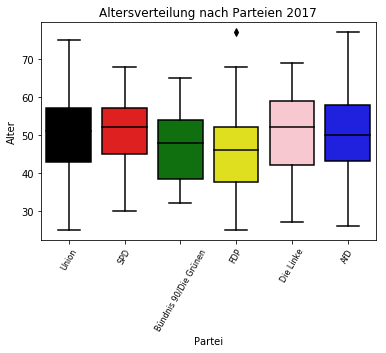

In [12]:
sns.boxplot(df_2017['PARTEI_KURZ'], df_2017['ALTER'], order=('Union', 'SPD', 'Bündnis 90/Die Grünen', 'FDP', 'Die Linke', 'AfD'), palette=color_dict)
plt.title('Altersverteilung nach Parteien 2017')
plt.xticks(rotation=60, size=8)
plt.xlabel('Partei')
plt.ylabel('Alter')
plt.savefig(graph_path+'age_distribution_2017.png')

## Geschlechterverteilung

Bei den Geschlechtern ist das Merkmal männlich als 1, das Merkmal weiblich als 0 definiert. Daraus ergibt sich, dass der Durschnittswert der Geschlechter-column dem Anteil der Männer entspricht. 

C:\Users\Marc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


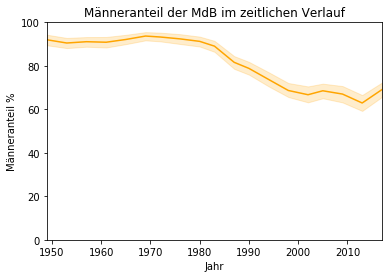

In [13]:
sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df, color='orange')
plt.xlabel("Jahr")
plt.xlim(1949, 2017)
plt.ylabel("Männeranteil %")
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('Männeranteil der MdB im zeitlichen Verlauf')
plt.savefig(graph_path+'gender_distribution_allparties.png')

Nun schlüsseln wir den Männeranteil nach Parteien auf. Dazu nutzen wir die oben definierten DataFrames, die nach Parteien gescliced sind.

C:\Users\Marc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


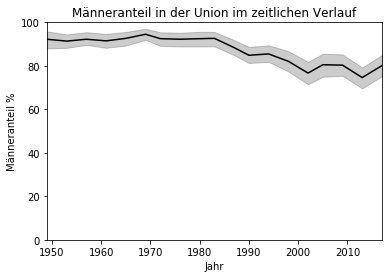

In [14]:
sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df_UNION, color='black')
plt.xlabel("Jahr")
plt.xlim(1949, 2017)
plt.ylabel("Männeranteil %")
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('Männeranteil in der Union im zeitlichen Verlauf')
plt.savefig(graph_path+'gender_distribution_Union.png')

C:\Users\Marc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


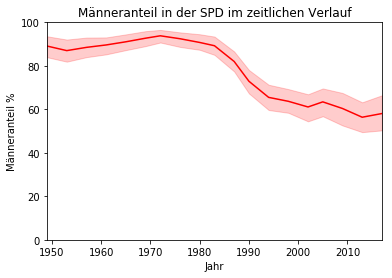

In [15]:
sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df_SPD, color='red')
plt.xlabel("Jahr")
plt.xlim(1949, 2017)
plt.ylabel("Männeranteil %")
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('Männeranteil in der SPD im zeitlichen Verlauf')
plt.savefig(graph_path+'gender_distribution_SPD.png')

C:\Users\Marc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


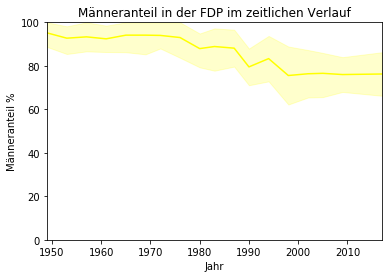

In [16]:
sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df_FDP, color='yellow')
plt.xlabel("Jahr")
plt.xlim(1949, 2017)
plt.ylabel("Männeranteil %")
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('Männeranteil in der FDP im zeitlichen Verlauf')
plt.savefig(graph_path+'gender_distribution_FDP.png')

C:\Users\Marc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


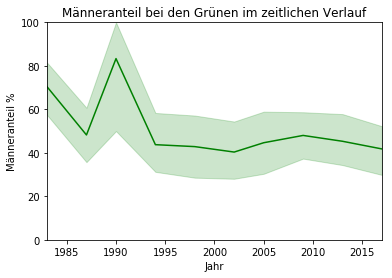

In [17]:
sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df_GRUENE, color='green')
plt.xlabel("Jahr")
plt.xlim(1983, 2017)
plt.ylabel("Männeranteil %")
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('Männeranteil bei den Grünen im zeitlichen Verlauf')
plt.savefig(graph_path+'gender_distribution_Gruene.png')

C:\Users\Marc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


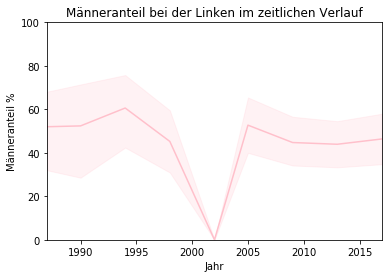

In [18]:
sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df_LINKE, color='pink')
plt.xlabel("Jahr")
plt.xlim(1987, 2017)
plt.ylabel("Männeranteil %")
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('Männeranteil bei der Linken im zeitlichen Verlauf')
plt.savefig(graph_path+'gender_distribution_Linke.png')

Die Linke ist 2002 nicht in den BT eingezogen, weshalb der Männeranteil in diesem Jahr auf 0 sinkt. Im Folgenden Plot wurde der Wert für 2002 aus dem DataFrame entfernt.

C:\Users\Marc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


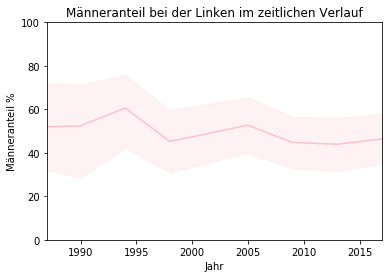

In [19]:
df_LINKE_inBT=df_LINKE[df_LINKE.ANFANG!=2002]
sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df_LINKE_inBT, color='pink')
plt.xlabel("Jahr")
plt.xlim(1987, 2017)
plt.ylabel("Männeranteil %")
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('Männeranteil bei der Linken im zeitlichen Verlauf')
plt.savefig(graph_path+'gender_distribution_Linke_wo2002.png')

Hier werden alle Graphen der Parteien zusammengefasst: Einmal in einem Plot und einmal via Subplots.

C:\Users\Marc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


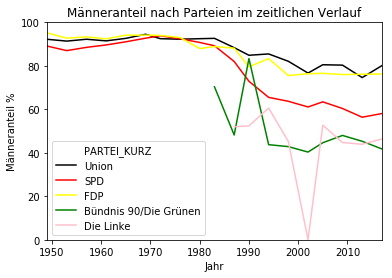

In [20]:
plt.rc('axes', prop_cycle=(cycler('color', ['black', 'red', 'yellow', 'green', 'pink'])))
sns.lineplot(x="ANFANG", y="GESCHLECHT", hue='PARTEI_KURZ', data=df_ALL, err_style=None)
plt.legend(loc='lower left')
plt.xlabel("Jahr")
plt.xlim(1949, 2017)
plt.ylabel("Männeranteil %")
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('Männeranteil nach Parteien im zeitlichen Verlauf')
plt.savefig(graph_path+'gender_distribution_oneplot.png')

C:\Users\Marc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


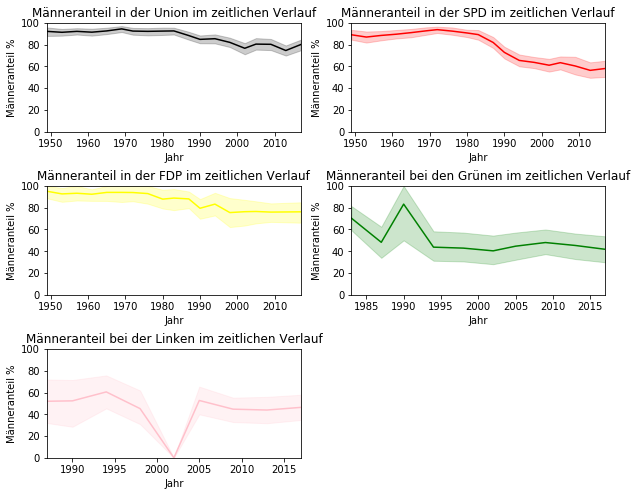

In [21]:
plt.figure(figsize=(10, 8))
plt.subplot(3, 2, 1)
sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df_UNION, color='black')
plt.xlabel("Jahr")
plt.xlim(1949, 2017)
plt.ylabel("Männeranteil %")
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('Männeranteil in der Union im zeitlichen Verlauf')
plt.subplot(3, 2, 2)
sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df_SPD, color='red')
plt.xlabel("Jahr")
plt.xlim(1949, 2017)
plt.ylabel("Männeranteil %")
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('Männeranteil in der SPD im zeitlichen Verlauf')
plt.subplot(3, 2, 3)
sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df_FDP, color='yellow')
plt.xlabel("Jahr")
plt.xlim(1949, 2017)
plt.ylabel("Männeranteil %")
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('Männeranteil in der FDP im zeitlichen Verlauf')
plt.subplot(3, 2, 4)
sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df_GRUENE, color='green')
plt.xlabel("Jahr")
plt.xlim(1983, 2017)
plt.ylabel("Männeranteil %")
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('Männeranteil bei den Grünen im zeitlichen Verlauf')
plt.subplot(3, 2, 5)
sns.lineplot(x="ANFANG", y="GESCHLECHT", data=df_LINKE, color='pink')
plt.xlabel("Jahr")
plt.xlim(1987, 2017)
plt.ylabel("Männeranteil %")
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('Männeranteil bei der Linken im zeitlichen Verlauf')
plt.subplots_adjust(hspace=0.5)
plt.savefig(graph_path+'gender_distribution_multiplot.png')


## Ausländeranteil

Als Ausländer wurden diejenigen definiert, deren Geburtsort nicht in Deutschland liegt. Hier wurden das Merkmal Ausland mit 0 für in Deutschland geborene und mit 1 für im Ausland geborene definiert. Dadurch ergibt sich der Ausländeranteil als Mittelwert des Merkmals Ausland.

C:\Users\Marc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


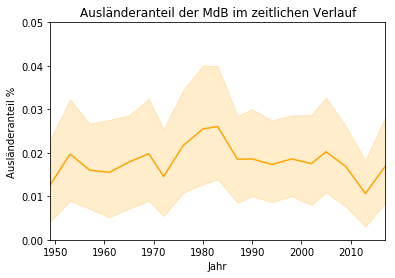

In [22]:
sns.lineplot(x="ANFANG", y="AUSLAND", data=df, color='orange')
plt.xlabel("Jahr")
plt.xlim(1949, 2017)
plt.ylabel("Ausländeranteil %")
plt.ylim(0, 0.05)
plt.title('Ausländeranteil der MdB im zeitlichen Verlauf')
plt.savefig(graph_path+'foreigner.png')

## Mandartsart

Es gibt zwei Möglichkeiten in den Bundestag einzuziehen, entweder über ein Direktmandat oder über die Landesliste. Die Direktwahl entspricht einem Wert von 1, während die Landesliste einen Wert von 0 hat. Der Durschnittswert entspricht also dem Anteil von MdB, die über ein Direktmandat eingezogen sind.

C:\Users\Marc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


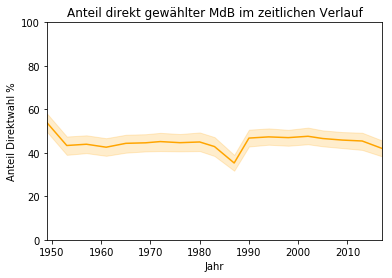

In [23]:
sns.lineplot(x="ANFANG", y="MANDATSART", data=df, color='orange')
plt.xlabel("Jahr")
plt.xlim(1949, 2017)
plt.ylabel("Anteil Direktwahl %")
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('Anteil direkt gewählter MdB im zeitlichen Verlauf')
plt.savefig(graph_path+'mandat.png')

## Weiterführung des Mandats (Survival-Rate)

Als survival-rate wird der Prozentsatz bezeichnet, zu dem die MdB einer Wahlperiode auch in der nächsten WP dem Bundestag angehören. 

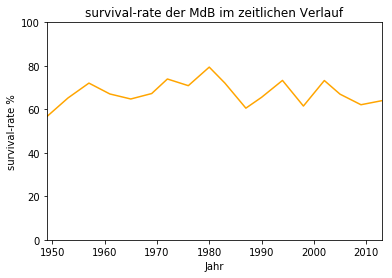

In [24]:
year_list=list(df.ANFANG.unique())
year_list.remove(2017)
survival_list=[]

x=1
for i in year_list:
    df_anfang=df[df.ANFANG==i]
    df_loop=df_anfang[df_anfang['WP{}'.format(x)]==1]
    survival_list.append(df_loop['WP{}'.format(x+1)].mean())
    x+=1

plt.plot(year_list, survival_list, color='orange')
plt.xlabel('Jahr')
plt.xlim(1949, 2013)
plt.ylabel('survival-rate %')
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('survival-rate der MdB im zeitlichen Verlauf')
plt.savefig(graph_path+'survival_allparties.png')

survival-rate nach Parteizugehörigkeit.

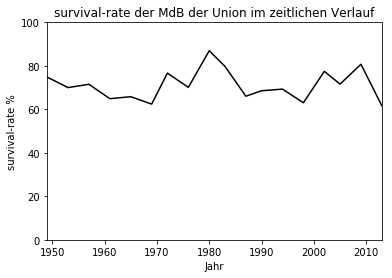

In [25]:
survival_list_Union=[]

x=1
for i in year_list:
    df_anfang_union=df_UNION[df_UNION.ANFANG==i]
    df_loop_Union=df_anfang_union[df_anfang_union['WP{}'.format(x)]==1]
    survival_list_Union.append(df_loop_Union['WP{}'.format(x+1)].mean())
    x+=1
    
plt.plot(year_list, survival_list_Union, color='black')
plt.xlabel('Jahr')
plt.xlim(1949, 2013)
plt.ylabel('survival-rate %')
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('survival-rate der MdB der Union im zeitlichen Verlauf')
plt.savefig(graph_path+'survival_Union.png')

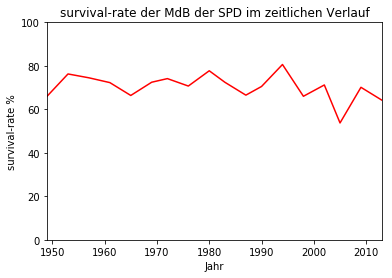

In [26]:
survival_list_SPD=[]

x=1
for i in year_list:
    df_anfang_SPD=df_SPD[df_SPD.ANFANG==i]
    df_loop_SPD=df_anfang_SPD[df_anfang_SPD['WP{}'.format(x)]==1]
    survival_list_SPD.append(df_loop_SPD['WP{}'.format(x+1)].mean())
    x+=1
    
plt.plot(year_list, survival_list_SPD, color='red')
plt.xlabel('Jahr')
plt.xlim(1949, 2013)
plt.ylabel('survival-rate %')
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('survival-rate der MdB der SPD im zeitlichen Verlauf')
plt.savefig(graph_path+'survival_SPD.png')

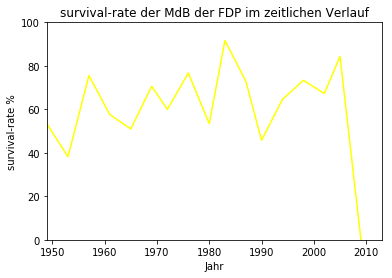

In [27]:
survival_list_FDP=[]

x=1
for i in year_list:
    df_anfang_FDP=df_FDP[df_FDP.ANFANG==i]
    df_loop_FDP=df_anfang_FDP[df_anfang_FDP['WP{}'.format(x)]==1]
    survival_list_FDP.append(df_loop_FDP['WP{}'.format(x+1)].mean())
    x+=1
    
plt.plot(year_list, survival_list_FDP, color='yellow')
plt.xlabel('Jahr')
plt.xlim(1949, 2013)
plt.ylabel('survival-rate %')
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('survival-rate der MdB der FDP im zeitlichen Verlauf')
plt.savefig(graph_path+'survival_FDP.png')

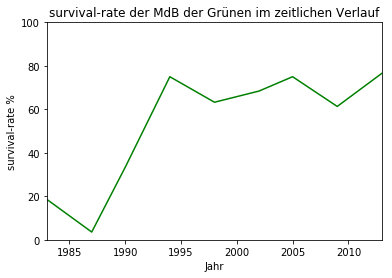

In [28]:
survival_list_Gruene=[]

x=1
for i in year_list:
    df_anfang_Gruene=df_GRUENE[df_GRUENE.ANFANG==i]
    df_loop_Gruene=df_anfang_Gruene[df_anfang_Gruene['WP{}'.format(x)]==1]
    survival_list_Gruene.append(df_loop_Gruene['WP{}'.format(x+1)].mean())
    x+=1
    
plt.plot(year_list, survival_list_Gruene, color='green')
plt.xlabel('Jahr')
plt.xlim(1983, 2013)
plt.ylabel('survival-rate %')
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('survival-rate der MdB der Grünen im zeitlichen Verlauf')
plt.savefig(graph_path+'survival_Gruene.png')

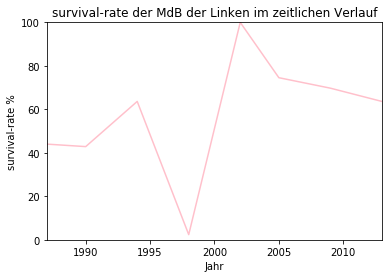

In [29]:
survival_list_Linke=[]

x=1
for i in year_list:
    df_anfang_Linke=df_LINKE[df_LINKE.ANFANG==i]
    df_loop_Linke=df_anfang_Linke[df_anfang_Linke['WP{}'.format(x)]==1]
    survival_list_Linke.append(df_loop_Linke['WP{}'.format(x+1)].mean())
    x+=1
    
plt.plot(year_list, survival_list_Linke, color='pink')
plt.xlabel('Jahr')
plt.xlim(1987, 2013)
plt.ylabel('survival-rate %')
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('survival-rate der MdB der Linken im zeitlichen Verlauf')
plt.savefig(graph_path+'survival_Linke.png')

Hier wird die Parteiabhängige Survival-rate für alle Parteien in einem Plot dargestellt.

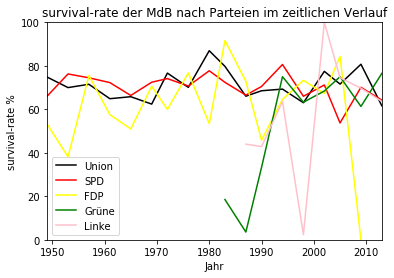

In [30]:
list_of_survival_lists=[survival_list_Union, survival_list_SPD, survival_list_FDP, survival_list_Gruene, survival_list_Linke]
label_list=['Union', 'SPD', 'FDP', 'Grüne', 'Linke']

plt.rc('axes', prop_cycle=(cycler('color', ['black', 'red', 'yellow', 'green', 'pink'])))
x=0
for party in list_of_survival_lists:
    plt.plot(year_list, party, label=label_list[x])
    x+=1
plt.legend(loc='lower left')
plt.xlabel('Jahr')
plt.xlim(1949, 2013)
plt.ylabel('survival-rate %')
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('survival-rate der MdB nach Parteien im zeitlichen Verlauf')
plt.savefig(graph_path+'survival_parties_oneplot.png')

Im Folgenden wird die survival-rate in Abhängigkeit vom Alter und vom Geschlecht geplotted.

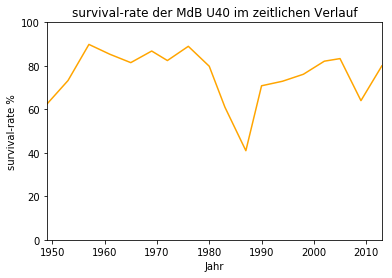

In [31]:
df_young=df[df.ALTER<40]

survival_list_young=[]

x=1
for i in year_list:
    df_anfang_young=df_young[df_young.ANFANG==i]
    df_loop_young=df_anfang_young[df_anfang_young['WP{}'.format(x)]==1]
    survival_list_young.append(df_loop_young['WP{}'.format(x+1)].mean())
    x+=1
    
plt.plot(year_list, survival_list_young, color='orange')
plt.xlabel('Jahr')
plt.xlim(1949, 2013)
plt.ylabel('survival-rate %')
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('survival-rate der MdB U40 im zeitlichen Verlauf')
plt.savefig(graph_path+'survival_young.png')

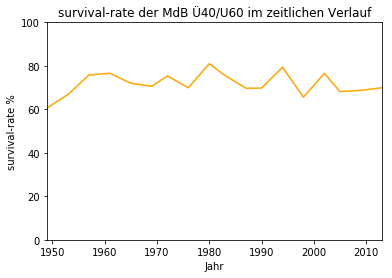

In [32]:
df_mid=df[df.ALTER<60]
df_mid=df_mid[df_mid.ALTER>40]

survival_list_mid=[]

x=1
for i in year_list:
    df_anfang_mid=df_mid[df_mid.ANFANG==i]
    df_loop_mid=df_anfang_mid[df_anfang_mid['WP{}'.format(x)]==1]
    survival_list_mid.append(df_loop_mid['WP{}'.format(x+1)].mean())
    x+=1
    
plt.plot(year_list, survival_list_mid, color='orange')
plt.xlabel('Jahr')
plt.xlim(1949, 2013)
plt.ylabel('survival-rate %')
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('survival-rate der MdB Ü40/U60 im zeitlichen Verlauf')
plt.savefig(graph_path+'survival_mid.png')

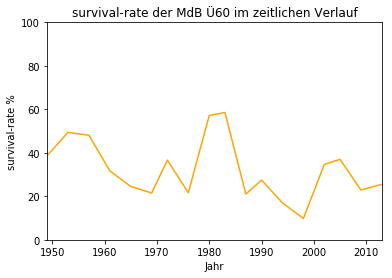

In [33]:
df_old=df[df.ALTER>60]

survival_list_old=[]

x=1
for i in year_list:
    df_anfang_old=df_old[df_old.ANFANG==i]
    df_loop_old=df_anfang_old[df_anfang_old['WP{}'.format(x)]==1]
    survival_list_old.append(df_loop_old['WP{}'.format(x+1)].mean())
    x+=1
    
plt.plot(year_list, survival_list_old, color='orange')
plt.xlabel('Jahr')
plt.xlim(1949, 2013)
plt.ylabel('survival-rate %')
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('survival-rate der MdB Ü60 im zeitlichen Verlauf')
plt.savefig(graph_path+'survival_old.png')

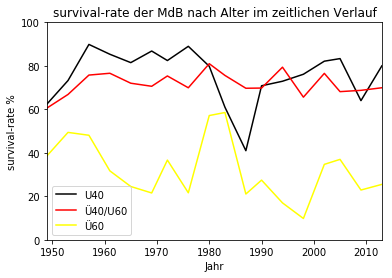

In [34]:
age_survival_lists=[survival_list_young, survival_list_mid, survival_list_old]
label_list=['U40', 'Ü40/U60', 'Ü60']

plt.rc('axes', prop_cycle=(cycler('color', ['black', 'red', 'yellow'])))
x=0
for age in age_survival_lists:
    plt.plot(year_list, age, label=label_list[x])
    x+=1
plt.legend(loc='lower left')
plt.xlabel('Jahr')
plt.xlim(1949, 2013)
plt.ylabel('survival-rate %')
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('survival-rate der MdB nach Alter im zeitlichen Verlauf')
plt.savefig(graph_path+'survival_age_oneplot.png')

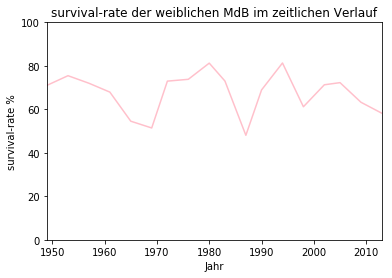

In [35]:
df_female=df[df.GESCHLECHT==0]

survival_list_female=[]

x=1
for i in year_list:
    df_anfang_female=df_female[df_female.ANFANG==i]
    df_loop_female=df_anfang_female[df_anfang_female['WP{}'.format(x)]==1]
    survival_list_female.append(df_loop_female['WP{}'.format(x+1)].mean())
    x+=1
    
plt.plot(year_list, survival_list_female, color='pink')
plt.xlabel('Jahr')
plt.xlim(1949, 2013)
plt.ylabel('survival-rate %')
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('survival-rate der weiblichen MdB im zeitlichen Verlauf')
plt.savefig(graph_path+'survival_female.png')

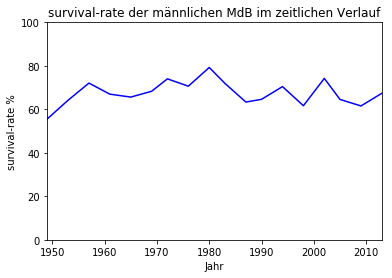

In [36]:
df_male=df[df.GESCHLECHT==1]

survival_list_male=[]

x=1
for i in year_list:
    df_anfang_male=df_male[df_male.ANFANG==i]
    df_loop_male=df_anfang_male[df_anfang_male['WP{}'.format(x)]==1]
    survival_list_male.append(df_loop_male['WP{}'.format(x+1)].mean())
    x+=1
    
plt.plot(year_list, survival_list_male, color='blue')
plt.xlabel('Jahr')
plt.xlim(1949, 2013)
plt.ylabel('survival-rate %')
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('survival-rate der männlichen MdB im zeitlichen Verlauf')
plt.savefig(graph_path+'survival_male.png')

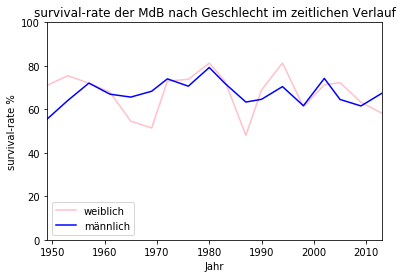

In [37]:
gender_survival_lists=[survival_list_female, survival_list_male]
label_list=['weiblich', 'männlich']

plt.rc('axes', prop_cycle=(cycler('color', ['pink', 'blue'])))
x=0
for gender in gender_survival_lists:
    plt.plot(year_list, gender, label=label_list[x])
    x+=1
plt.legend(loc='lower left')
plt.xlabel('Jahr')
plt.xlim(1949, 2013)
plt.ylabel('survival-rate %')
plt.ylim(0, 1)
plt.yticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [0, 20, 40, 60, 80, 100])
plt.title('survival-rate der MdB nach Geschlecht im zeitlichen Verlauf')
plt.savefig(graph_path+'survival_gender_oneplot.png')